**Background**

E-commerce companies like Amazon ,Flipkart uses different recommendation systems to provide suggestions to the customers. Amazon uses currently item-to-item collaborative filtering, which scales to massive datasets and produces high quality recommendation system in the real time. This system is a kind of a information filtering system which seeks to predict the "rating" or preferences which user is interested in.


**Introduction to Recommendation systems**


A recommendation engine is a system or algorithm that analyzes user data and provides personalized suggestions or recommendations for items or content that the user may be interested in. These recommendations are based on various factors such as the user's preferences, historical behavior, demographic information, and similarities to other users.

Recommendation engines are commonly used in e-commerce, OTT platforms , social media, and other online services to enhance user experience and engagement. They help users discover new products, movies, music, articles, or any other items that align with their interests.

Recommender system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.

**What does a recommender system solve?**

1.  It can help the user to find the right product.
2.  It can increase the user engagement. For example, there's 40% more clicks on the google news due to recommendations.
3.  It helps the item providers to deliver the items to the right user. In Amazon, 35 % products get sold due to recommendations.
4.  It helps to make the contents more personalized. In Netflix most of the rented movies are from recommendations.

**Types of recommendations**

There are mainly 6 types of the recommendations systems :-

1.  Popularity based systems :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.
2.  Classification model based:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the product.
3. Content based recommedations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.
4. Collaberative Filtering:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item

5. Hybrid Approaches:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches .

6. Association rule mining :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions


**Attribute Information:**

● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating (ignore this column for this exercise)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
# User-defined function to check library is installed or not, if not installed then it will install automatically at runtime.
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

The Amazon product review dataset is huge, the size of the dataset is around 300 MB so it is recommended to download the dataset using the Kaggle repository which will be handy and will save your time and resources.

In [3]:
if 'amazon-product-reviews' not in os.listdir():
  check_and_install_library('opendatasets')
  import opendatasets as od
  od.download('https://www.kaggle.com/datasets/irvifa/amazon-product-reviews')

opendatasets is not installed. Installing...


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting opendatasets

Downloading opendatasets-0.1.22-py3-none-any.whl (15 kB)

Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from opendatasets) (4.66.4)

Requirement already satisfied: kaggle in /usr/local/lib/python3.10/dist-packages (from opendatasets) (1.6.14)

Requirement already satisfied: click in /usr/local/lib/python3.10/dist-packages (from opendatasets) (8.1.7)

Requirement already satisfied: six>=1.10 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (1.16.0)

Requirement already satisfied: certifi>=2023.7.22 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2024.6.2)

Requirement already satisfied: python-dateutil in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.8.2)

Requirement already satisfied: requests in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.31.0)

Requirement already satisfied: python-slugify in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (8.0.4)

Requirement already satisfied: urllib3 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.0.7)

Requirement already satisfied: bleach in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (6.1.0)

Requirement already satisfied: webencodings in /usr/local/lib/python3.10/dist-packages (from bleach->kaggle->opendatasets) (0.5.1)

Requirement already satisfied: text-unidecode>=1.3 in /usr/local/lib/python3.10/dist-packages (from python-slugify->kaggle->opendatasets) (1.3)

Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (3.3.2)

Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (3.7)

Installing collected packages: opendatasets

Successfully installed opendatasets-0.1.22

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adarshbhaskar
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/irvifa/amazon-product-reviews


100%|██████████| 109M/109M [00:02<00:00, 54.3MB/s]


In [4]:
# Load the dataframe and set column name
df=pd.read_csv('amazon-product-reviews/ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [5]:
df.shape

(7824482, 4)

In [6]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

Since the dataset is too big which makes it difficult to analyze the entire dataset due to limited resources, hence we randomly consider 20% of the data as the sample out of the whole dataset which gives around 1564896.

In [7]:
electronics_data=df.sample(n=1564896,ignore_index=True)

In [8]:
# After taking samples drop df to release the memory occupied by entire dataframe
del df

In [9]:
# Print top 5 records of the dataset
electronics_data.head()

,userId,productId,rating,timestamp
0,A1TWTV8PCHSYJT,B00A0HZOEA,5.0,1386288000
1,A1UW7LSH689W1T,B00005AY94,1.0,1062806400
2,APF2A1P3MEAUE,B002YAOS7A,4.0,1307059200
3,AMG45XNVXS4J4,B000KMVIDQ,1.0,1207526400
4,A2HEXX1YNDN2MR,B004K41LZU,3.0,1322870400


In [10]:
#print the concise information of the dataset
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [11]:
# Drop timestamp column
electronics_data.drop('timestamp',axis=1,inplace=True)

In [12]:
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.013669e+00
std,1.380625e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


As we can see minimum rating of the products is 1 , maximum rating is 5 and average rating of the products is around 4.

In [13]:
# Handle missing values
electronics_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [14]:
# Handling duplicate records
electronics_data[electronics_data.duplicated()].shape[0]

0

In [15]:
electronics_data.head()

,userId,productId,rating
0,A1TWTV8PCHSYJT,B00A0HZOEA,5.0
1,A1UW7LSH689W1T,B00005AY94,1.0
2,APF2A1P3MEAUE,B002YAOS7A,4.0
3,AMG45XNVXS4J4,B000KMVIDQ,1.0
4,A2HEXX1YNDN2MR,B004K41LZU,3.0


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

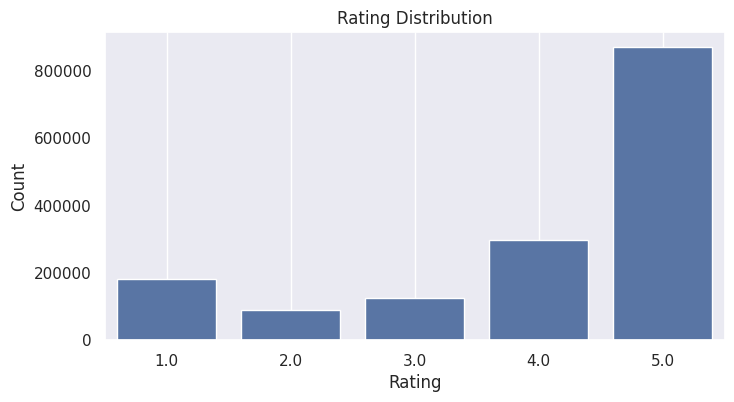

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

most of the user have given 5 rating

In [17]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1226230
Total unique products :  237623


analyzing the rating by user

In [18]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A3OXHLG6DIBRW8    97
A5JLAU2ARJ0BO     95
ADLVFFE4VBT8      94
A6FIAB28IS79      93
A680RUE1FDO8B     87
Name: rating, dtype: int64

In [19]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 23 


**Popularity Based Recommendation**

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user but you cannot recommend items accordingly.

In [20]:
data=electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [21]:
data.head()

,userId,productId,rating
2,APF2A1P3MEAUE,B002YAOS7A,4.0
6,A3QQK05OD0HDHJ,B006ZP8UOW,5.0
8,A2LCXBXZJYCUXU,B007PJ4P4G,5.0
11,ACXUVW6BIHU6C,B002WN1GOW,5.0
13,A1OZYB8XPCH50R,B003VANOI6,4.0


In [22]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [23]:
no_of_rating_per_product.head()

productId
B0074BW614    3616
B00DR0PDNE    3154
B007WTAJTO    2842
B0019EHU8G    2449
B006GWO5WK    2422
Name: rating, dtype: int64

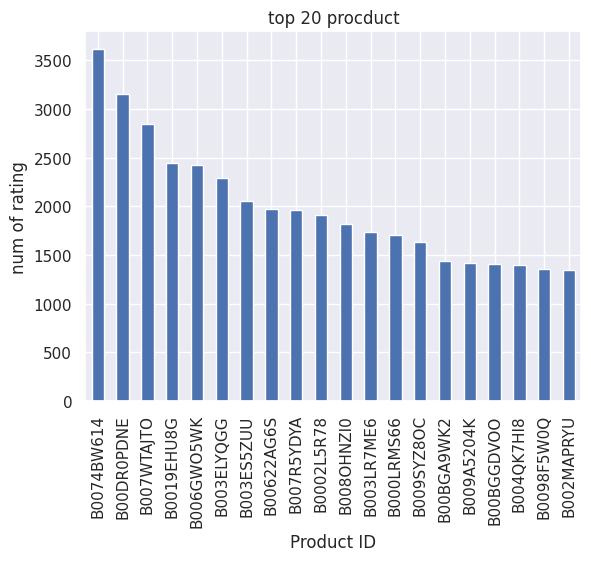

In [24]:
# Top 20 products
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

In [25]:
# Average ratings of the products
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [26]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.500000
1400501466,3.792453
1400532655,3.462366
140053271X,4.053333
B00000DM9W,4.523077


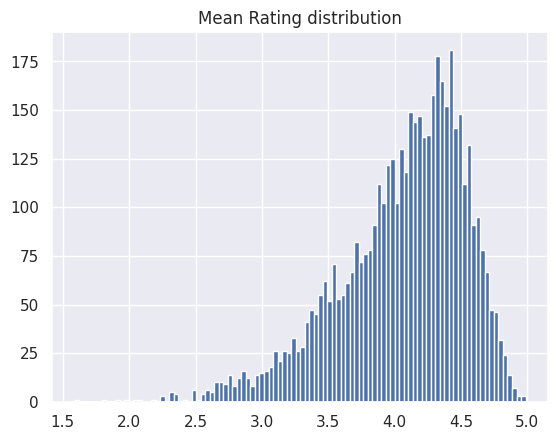

In [27]:
# Plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [28]:
# Check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-0.9234971289625914

In [29]:
# It is highly negative skewed

In [30]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [31]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.500000,222
1400501466,3.792453,53
1400532655,3.462366,93
140053271X,4.053333,75
B00000DM9W,4.523077,65


In [32]:
# Highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.490597,3616


In [33]:
# Min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  130


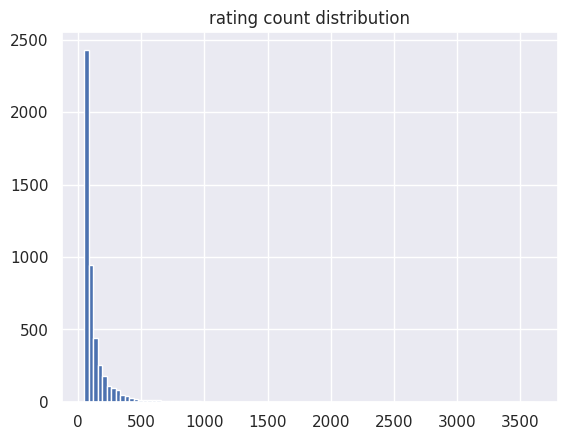

In [34]:
# Plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

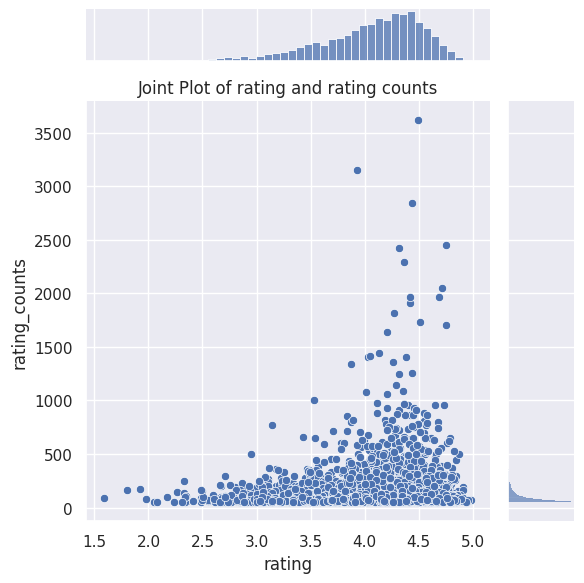

In [35]:
# Joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

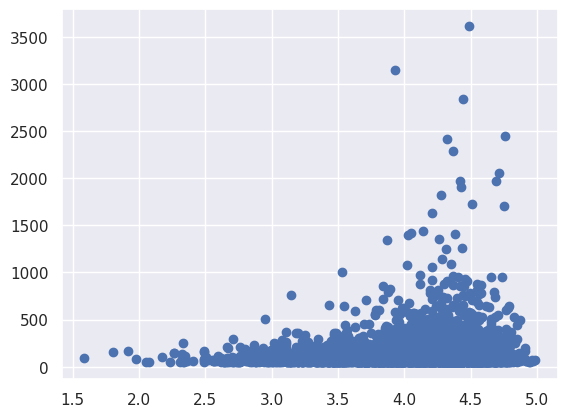

In [36]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [37]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.11052868348025742 


**Collaberative filtering (Item-Item recommedation)**

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item. Collaborative filtering has two sub-categories that are generally called memory-based and model-based approaches.

In [38]:
# Import surprise library for collebrative filtering
check_and_install_library('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

surprise is not installed. Installing...


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting surprise

Downloading surprise-0.1-py2.py3-none-any.whl (1.8 kB)

Collecting scikit-surprise (from surprise)

Downloading scikit_surprise-1.1.4.tar.gz (154 kB)

Output()

Installing build dependencies: started

Installing build dependencies: finished with status 'done'

Getting requirements to build wheel: started

Getting requirements to build wheel: finished with status 'done'

Preparing metadata (pyproject.toml): started

Preparing metadata (pyproject.toml): finished with status 'done'

Requirement already satisfied: joblib>=1.2.0 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.4.2)

Requirement already satisfied: numpy>=1.19.5 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.25.2)

Requirement already satisfied: scipy>=1.6.0 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.11.4)

Building wheels for collected packages: scikit-surprise

Building wheel for scikit-surprise (pyproject.toml): started

Building wheel for scikit-surprise (pyproject.toml): finished with status 'done'

Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357254 sha256=cf691ef642eb4e873a84a7d7ab990cfbf4deffbe4a7c1540da7ad7642b10e8f6

Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54

Successfully built scikit-surprise

Installing collected packages: scikit-surprise, surprise

Successfully installed scikit-surprise-1.1.4 surprise-0.1

In [39]:
# Reading the dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data,reader)

In [40]:
# Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [41]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [42]:
# Make prediction using testset
test_pred=algo.test(testset)

In [43]:
# Print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3109


1.3109418434822713

**Model-based collaborative filtering system**

These methods are based on machine learning and data-mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [44]:
data2 = data.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400501466,1400532655,140053271X,B00000DM9W,B00000J061,B00000JI4F,B00000K135,B00000K2YR,B00001OWYM,...,B00HNFPZF0,B00HNGB1YS,B00HRO3IBA,B00HTPHK5W,B00I2VIR2M,B00I2ZBD1U,B00IGISO9C,B00INNP5VU,B00IVPU786,B00J46VVKE
userId,,,,,,,,,,,,,,,,,,,,,
A0018140387F6UF838FIT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01001491AKX4LBK2SDWP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0103047AS0C8QKUI0X2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01923862M5E0UY92603C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0192610J06ILO8ZU7I2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


above we have created a pivot table of the rating where the value of the column will rating and index will be userId and the column name will be productId

In [45]:
# Check the shape of the rating_matrix
ratings_matrix.shape

(19902, 4394)

In [46]:
# Transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A0018140387F6UF838FIT,A01001491AKX4LBK2SDWP,A0103047AS0C8QKUI0X2,A01923862M5E0UY92603C,A0192610J06ILO8ZU7I2,A0265288N4QKTDEE9OUD,A031662732J1CQ7SGUFZT,A03781433MOGB6PZVYN6Y,A04245063K89BKFDPCW6I,A052805818GLEKKU4JCFZ,...,AZYPM8H0VS6AD,AZYWMNN85D7BB,AZYYUCMIK4Y4Z,AZZ2HXC308RW1,AZZ7ZFUFSLK0T,AZZDTWPYBMT6L,AZZGLM4QTWJKU,AZZQDEEOTBX96,AZZTC2OYVNE2Q,AZZX63RW29X2S
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140053271X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000DM9W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
x_ratings_matrix.shape

(4394, 19902)

In [48]:
# Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4394, 10)

In [49]:
# Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4394, 4394)

In [50]:
x_ratings_matrix.index[10]

'B00001P4XH'

In [51]:
i="B00001P4ZH"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

11


Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [52]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4394,)

In [53]:
correlation_matrix[correlation_product_ID>0.75].shape

(574, 4394)

In [54]:
# Recommending the top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['0972683275',
 '1400501466',
 'B00000K2YR',
 'B00001P4ZH',
 'B00004WCGF',
 'B00004Z0C7',
 'B000051ZOA',
 'B00005ATMB',
 'B00005NIMJ',
 'B000065BP9',
 'B000069EUW',
 'B00006BBAC',
 'B00006IS4X',
 'B00006JQ06',
 'B000089GN4',
 'B00008AWKZ',
 'B00008VF5W',
 'B00009EHJV',
 'B0000A0AJH',
 'B0000AZK0D']